<a href="https://colab.research.google.com/github/mstavens/Cancer/blob/Breast-Cancer-Detection/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import th required libraries
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
!pip install ucimlrepo


In [ ]:
#Import the data from the UC Irvine Machine Learning Repository
from ucimlrepo import fetch_ucirepo

In [ ]:


# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
print(X.dtypes)
print("Features type is", y.dtypes)

radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object
Features type is Diagnosis    object
dtype: object


<Axes: xlabel='Diagnosis', ylabel='count'>

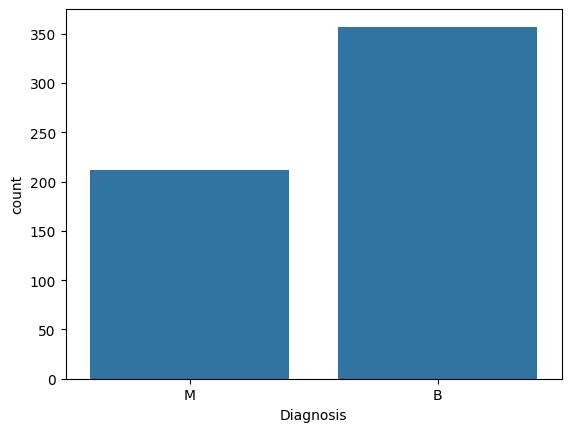

In [ ]:
sns.countplot(x="Diagnosis", data=y)

In [ ]:
#Let's recode the target variable
#Replacing M by 1 and B by 0.
labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


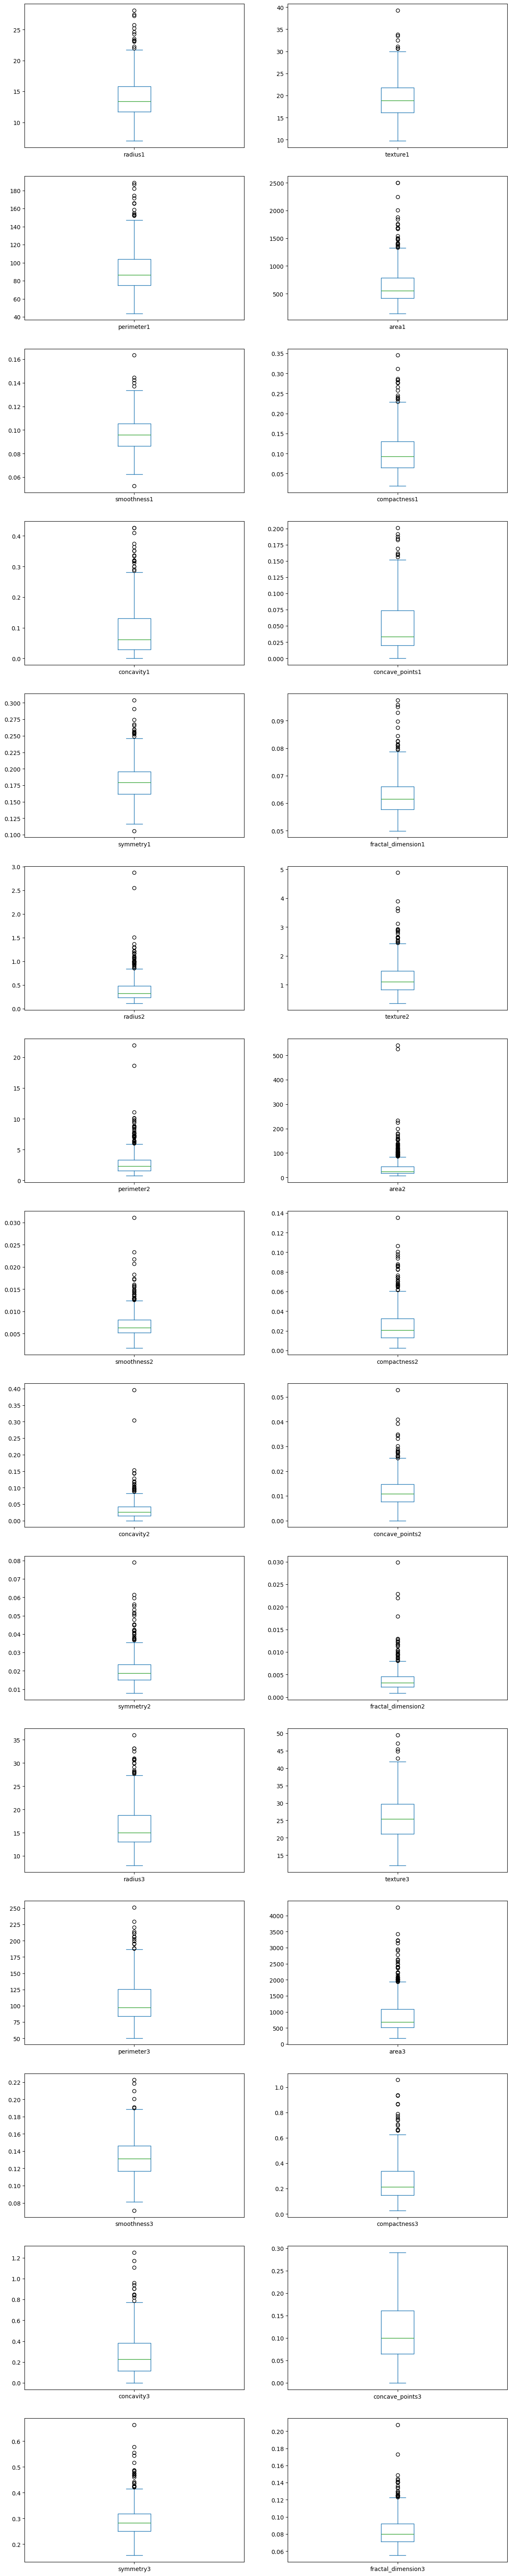

In [ ]:
X.plot(kind="box",subplots=True,layout=(15,2),figsize=(15,80));


In [ ]:
#Now let's normalize the scale of the explicatives values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [ ]:
#Split data between Train and Tests Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create the ANN model
model = Sequential()
model.add(Dense(64, input_dim=30, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,609 (18.00 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#Let's fit the model
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6483 - loss: 0.6895 - val_accuracy: 0.6228 - val_loss: 0.6757
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6055 - loss: 0.6755 - val_accuracy: 0.6228 - val_loss: 0.6432
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6783 - loss: 0.6395 - val_accuracy: 0.7456 - val_loss: 0.5911
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7393 - loss: 0.5873 - val_accuracy: 0.8158 - val_loss: 0.5136
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8196 - loss: 0.5185 - val_accuracy: 0.8772 - val_loss: 0.4241
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9218 - loss: 0.4279 - val_accuracy: 0.9211 - val_loss: 0.3318
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8773 - loss: 0.3776 - val_accuracy: 0.9561 - val_loss: 0.2490
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9109 - loss: 0.2841 - val_accuracy: 0.9298 -

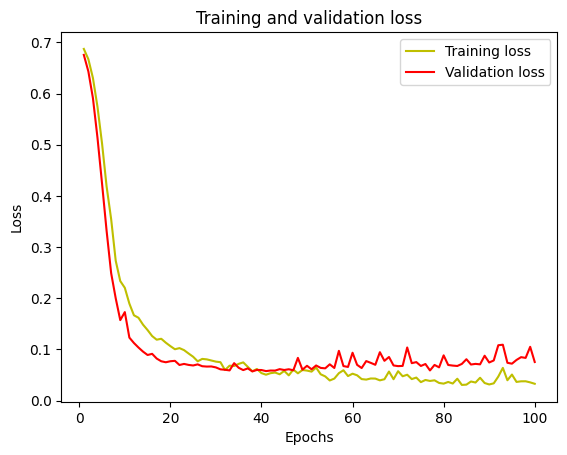

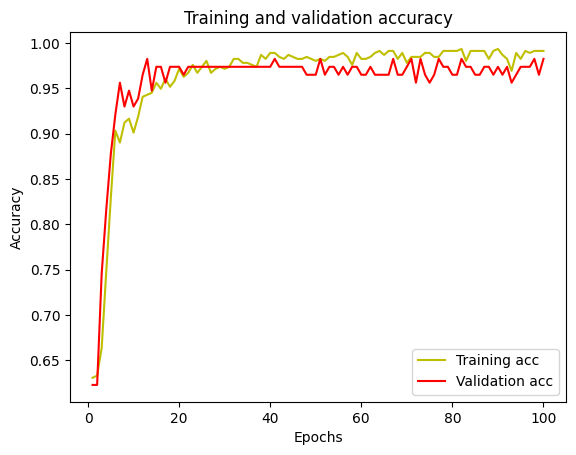

In [ ]:
#Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Create the SVM model
#Let's search the best hyperparameters for the model
param_grid = {'C': [0.1, 1, 10, 1000], 'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'degree':[1,2,3,4,5,6]}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits
[CV] END ...........C=0.1, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...........C=0.1, degree=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ..........C=0.1, degree=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=0.1, degree=1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END .......C=0.1, degree=1, gamma=scale,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [ ]:
print(grid.score(X_test, y_test))

0.9736842105263158


In [ ]:
#Let's evaluate the best model on the Test set
y_pred = grid.best_estimator_.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Test Accuracy: 0.9736842105263158
